## REST APIs

<p>Rest APIs function by sending a <b>request</b>, the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or <b>resource</b> to perform. In a similar manner, API returns a <b>response</b>, via an HTTP message, this response is usually contained within a JSON.</p>
<p>In this lab, we will use the <a href=https://pypi.org/project/nba-api/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>NBA API</a> to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API to determine the number of points the Golden State Warriors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly it the  Golden State Warriors lost  by two points the result will be negative two. The API will handle a lot of the details, such a Endpoints and Authentication. </p>

It's quite simple to use the nba api to make a request for a specific team. We don't require a JSON, all we require is an id. This information is stored locally in the API. We import the module `teams`.

In [1]:
!pip install nba_api

     -------------------------------------- 279.4/279.4 kB 4.3 MB/s eta 0:00:00
     --------------------------------------- 15.8/15.8 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [8]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def one_dict(list_dict):
    
    keys = list_dict[0].keys()
    
    out_dict = {key:[] for key in keys}
    
    for dict_ in list_dict:
        
        for key, value in dict_.items():
            
            out_dict[key].append(value)
            
    return out_dict

The method get_teams() returns a list of dictionaries.

In [5]:
nba_teams = teams.get_teams()

The dictionary key id has a unique identifier for each team as a value. Let's look at the first three elements of the list:

In [6]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

To make things easier, we can convert the dictionary to a table. First, we use the function <code>one dict</code>, to create a dictionary. We use the common keys for each team as the keys, the value is a list; each element of the list corresponds to the values for each team.
We then convert the dictionary to a dataframe, each row contains the information for a different team.

In [9]:
dict_nba_team = one_dict(nba_teams)

df_teams = pd.DataFrame(dict_nba_team)

df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


Will use the team's nickname to find the unique id, we can see the row that contains the warriors by using the column nickname as follows:


In [10]:
df_warriors = df_teams[df_teams['nickname'] == 'Warriors']

df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


We can use the following line of code to access the first column of the DataFrame:

In [11]:
id_warriors=df_warriors[['id']].values[0][0]
# we now have an integer that can be used to request the Warriors information 
id_warriors

1610612744

The function "League Game Finder " will make an API call, it's in the module stats.endpoints.

In [12]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter team_id_nullable is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.
The information requested is provided and is transmitted via an HTTP response this is assigned to the object game finder.

In [ ]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is commented out, you can run it on jupyter labs on your own computer.
# gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

We can see the json file by running the following line of code.

In [ ]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is commented out, you can run it on jupyter labs on your own computer.
# gamefinder.get_json()

The game finder object has a method get_data_frames(), that returns a dataframe. If we view the dataframe, we can see it contains information about all the games the Warriors played. The PLUS_MINUS column contains information on the score, if the value is negative, the Warriors lost by that many points, if the value is positive, the warriors won by that amount of points. The column MATCHUP has the team the Warriors were playing, GSW stands for Golden State Warriors and TOR means Toronto Raptors. vs signifies it was a home game and the @ symbol means an away game.

In [ ]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
# games = gamefinder.get_data_frames()[0]
# games.head()

You can download the dataframe from the API call for Golden State and run the rest like a video.

In [13]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    
    response = requests.get(url)
    
    if response.status_code == 200:
        
        with open(filename, "wb") as f:
            
            f.write(response.content)

download(filename, "Golden_State.pkl")

In [14]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


We can create two dataframes, one for the games that the Warriors faced the raptors at home, and the second for away games.

In [15]:
games_home = games[games['MATCHUP'] == 'GSW vs. TOR']
games_away = games[games['MATCHUP'] == 'GSW @ TOR']

We can calculate the mean for the column PLUS_MINUS for the dataframes games_home and  games_away:

In [16]:
games_home['PLUS_MINUS'].mean()

3.730769230769231

In [17]:
games_away['PLUS_MINUS'].mean()

-0.6071428571428571

We can plot out the PLUS MINUS column for the dataframes games_home and  games_away. We see the warriors played better at home.

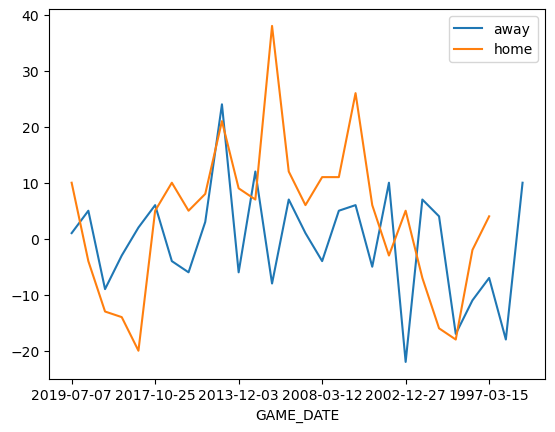

In [18]:
fig, ax = plt.subplots()

games_away.plot(x = 'GAME_DATE', y = 'PLUS_MINUS', ax = ax)

games_home.plot(x = 'GAME_DATE', y = 'PLUS_MINUS', ax = ax)

ax.legend(["away", "home"])

plt.show()